In [ ]:
import pandas as pd
import numpy as np

In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

patients_df = pd.read_csv('mohs_patients_10000.csv')
patients_df.drop(columns=['PatientID'], inplace=True)

In [31]:
inputs = patients_df.drop(columns=['Complexity'])
output = patients_df['Complexity']

output = patients_df['Complexity'].map({
    'Simple': 0,
    'Complex': 1
})

inputs = pd.get_dummies(inputs, drop_first=True)

inputs_train, inputs_test, output_train, output_test = train_test_split(
    inputs, output, test_size=0.2, random_state=42
)

model = LinearRegression()

model.fit(inputs_train, output_train)

output_pred = model.predict(inputs_test)

mse = mean_squared_error(output_test, output_pred)
r2 = r2_score(output_test, output_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.11
R-squared: 0.49


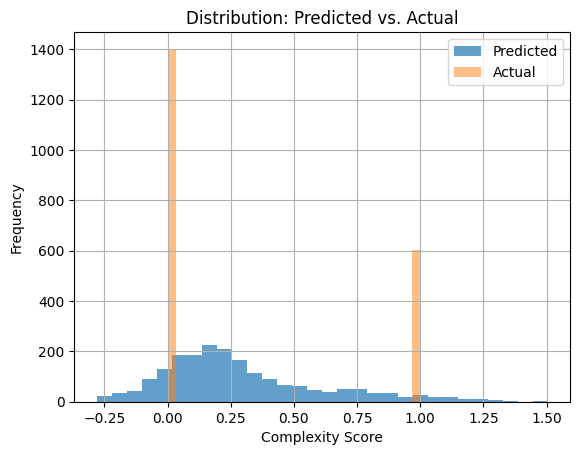

In [34]:
import matplotlib.pyplot as plt

plt.hist(output_pred, bins=30, alpha=0.7, label="Predicted")
plt.hist(output_test, bins=30, alpha=0.5, label="Actual")
plt.xlabel("Complexity Score")
plt.ylabel("Frequency")
plt.title("Distribution: Predicted vs. Actual")
plt.legend()
plt.grid(True)
plt.show()




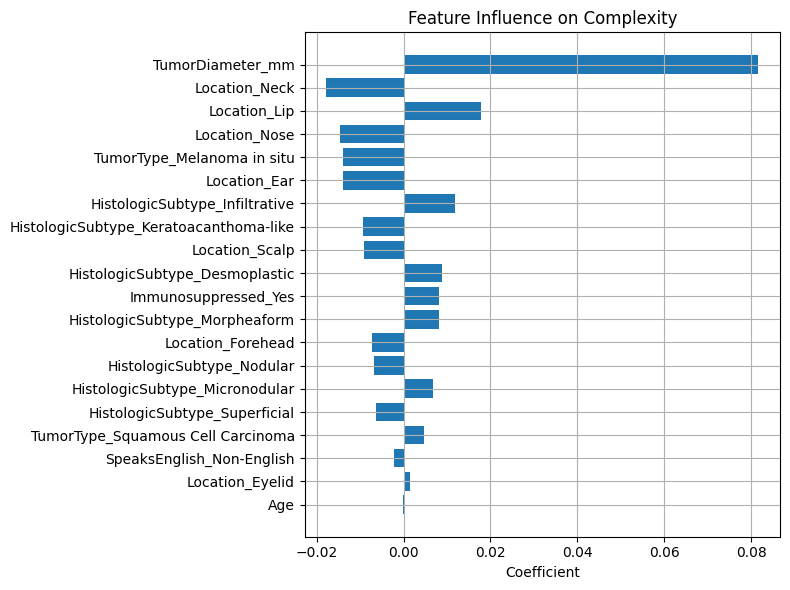

In [35]:
coef_df = pd.DataFrame({
    'Feature': inputs.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel("Coefficient")
plt.title("Feature Influence on Complexity")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


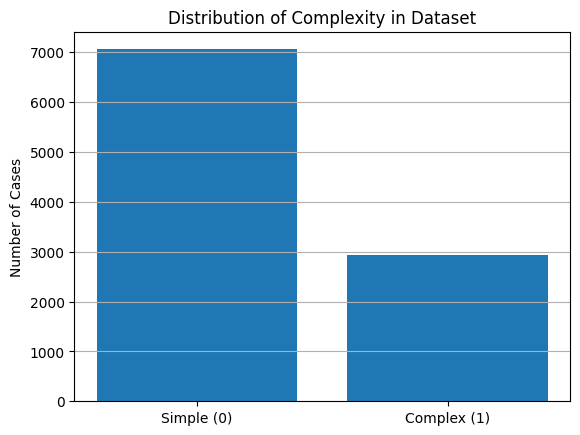

In [ ]:
import matplotlib.pyplot as plt


class_counts = output.value_counts().sort_index()

plt.bar(['Simple (0)', 'Complex (1)'], class_counts)
plt.ylabel("Number of Cases")
plt.title("Distribution of Complexity in Dataset")
plt.grid(True, axis='y')
plt.show()
